Deep Learning y Computer Vision

In [2]:
import os
import zipfile
import shutil

Eliminamos la base de datos actual

In [3]:
# Ruta de la carpeta 'dataset'
dataset_folder = r'C:\Documentos\CURSOS\Diplomatura en Data Science Aplicada\TPS entregados\TP5\imagenes\dataset'

# Eliminar la carpeta 'dataset' y todo su contenido
try:
    shutil.rmtree(dataset_folder)
    print(f"Carpeta '{dataset_folder}' eliminada con éxito.")
except FileNotFoundError:
    print(f"La carpeta '{dataset_folder}' no existe.")
except Exception as e:
    print(f"Error al eliminar la carpeta '{dataset_folder}': {e}")

La carpeta 'C:\Documentos\CURSOS\Diplomatura en Data Science Aplicada\TPS entregados\TP5\imagenes\dataset' no existe.


Creamos las carpetas necesarias para armar la base de datos

In [4]:
#Base de datos
def create_folders(base_path, structure):
    try:
        for folder, subfolders in structure.items():
            # Crear carpeta principal
            main_folder_path = os.path.join(base_path, folder)
            os.makedirs(main_folder_path, exist_ok=True)
            print(f"Carpeta '{main_folder_path}' creada o ya existía.")
            
            # Crear subcarpetas dentro de la carpeta principal
            for subfolder in subfolders:
                subfolder_path = os.path.join(main_folder_path, subfolder)
                os.makedirs(subfolder_path, exist_ok=True)
                print(f"Carpeta '{subfolder_path}' creada o ya existía.")
    except Exception as e:
        print(f"Error al crear las carpetas: {e}")

# Ruta base del dataset
base_path = "dataset"

# Estructura de carpetas: claves son nombres de carpetas principales, valores son listas de subcarpetas
folder_structure = {
    "val": ["dog", "cat"],
    "train": ["dog", "cat"]
}

# Crear la estructura de carpetas
create_folders(base_path, folder_structure)

Carpeta 'dataset\val' creada o ya existía.
Carpeta 'dataset\val\dog' creada o ya existía.
Carpeta 'dataset\val\cat' creada o ya existía.
Carpeta 'dataset\train' creada o ya existía.
Carpeta 'dataset\train\dog' creada o ya existía.
Carpeta 'dataset\train\cat' creada o ya existía.


Al observar la cantidad de imagenes de entrenamiento y validación, observamos que existe un desbalance entre las 2 clases (cat y dog), por lo que se aplicará oversampling para balancear dichas clases: se aumentará  la cantidad de imagenes de cat, para que  sea igual a la cantidad de imagenes de dog.  

In [5]:
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import array_to_img

# Rutas de origen y destino
orig_train_cat = 'C:/Documentos/CURSOS/Diplomatura en Data Science Aplicada/TPS entregados/TP5/imagenes/train/cat'
orig_train_dog = 'C:/Documentos/CURSOS/Diplomatura en Data Science Aplicada/TPS entregados/TP5/imagenes/train/dog'
orig_val_cat = 'C:/Documentos/CURSOS/Diplomatura en Data Science Aplicada/TPS entregados/TP5/imagenes/val/cat'
orig_val_dog = 'C:/Documentos/CURSOS/Diplomatura en Data Science Aplicada/TPS entregados/TP5/imagenes/val/dog'

dest_train_cat = 'C:/Documentos/CURSOS/Diplomatura en Data Science Aplicada/TPS entregados/TP5/imagenes/dataset/train/cat'
dest_train_dog = 'C:/Documentos/CURSOS/Diplomatura en Data Science Aplicada/TPS entregados/TP5/imagenes/dataset/train/dog'
dest_val_cat = 'C:/Documentos/CURSOS/Diplomatura en Data Science Aplicada/TPS entregados/TP5/imagenes/dataset/val/cat'
dest_val_dog = 'C:/Documentos/CURSOS/Diplomatura en Data Science Aplicada/TPS entregados/TP5/imagenes/dataset/val/dog'

# Crear carpetas de destino si no existen
for path in [dest_train_cat, dest_train_dog, dest_val_cat, dest_val_dog]:
    os.makedirs(path, exist_ok=True)

# Configuración de aumento de datos
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=15,
    zoom_range=0.5,
    horizontal_flip=True
)

# Función para copiar imágenes desde la ruta de origen al destino
def copy_images(source_dir, dest_dir, num_images):
    images = os.listdir(source_dir)
    for i, image in enumerate(images[:num_images]):
        shutil.copy(os.path.join(source_dir, image), os.path.join(dest_dir, image))
    print(f"Se copiaron {num_images} imágenes desde {source_dir} a {dest_dir}.")

# Función para generar imágenes por oversampling
def augment_and_save(source_dir, dest_dir, num_images):
    generator = datagen.flow_from_directory(
        os.path.dirname(source_dir),  
        classes=[os.path.basename(source_dir)],  
        target_size=(224, 224),
        batch_size=1,  
        class_mode=None,
        shuffle=True
    )
    
    images_generated = 0
    while images_generated < num_images:
        next_batch = next(generator)  
        for img in next_batch:
            if images_generated >= num_images:
                break  
            img_filename = f"aug_{images_generated + 1}.jpeg"
            img_path = os.path.join(dest_dir, img_filename)
            array_to_img(img).save(img_path)
            images_generated += 1
    print(f"Se generaron exactamente {images_generated} imágenes en {dest_dir}.")

# Paso 1: Copiar imágenes de 'dog'
copy_images(orig_train_dog, dest_train_dog, 180)
copy_images(orig_val_dog, dest_val_dog, 46)

# Paso 2: Copiar imágenes originales de 'cat'
copy_images(orig_train_cat, dest_train_cat, 95)
copy_images(orig_val_cat, dest_val_cat, 24)

# Paso 3: Generar imágenes adicionales para 'cat'
augment_and_save(orig_train_cat, dest_train_cat, 85)  # 180 - 95
augment_and_save(orig_val_cat, dest_val_cat, 22)     # 46 - 24


Se copiaron 180 imágenes desde C:/Documentos/CURSOS/Diplomatura en Data Science Aplicada/TPS entregados/TP5/imagenes/train/dog a C:/Documentos/CURSOS/Diplomatura en Data Science Aplicada/TPS entregados/TP5/imagenes/dataset/train/dog.
Se copiaron 46 imágenes desde C:/Documentos/CURSOS/Diplomatura en Data Science Aplicada/TPS entregados/TP5/imagenes/val/dog a C:/Documentos/CURSOS/Diplomatura en Data Science Aplicada/TPS entregados/TP5/imagenes/dataset/val/dog.
Se copiaron 95 imágenes desde C:/Documentos/CURSOS/Diplomatura en Data Science Aplicada/TPS entregados/TP5/imagenes/train/cat a C:/Documentos/CURSOS/Diplomatura en Data Science Aplicada/TPS entregados/TP5/imagenes/dataset/train/cat.
Se copiaron 24 imágenes desde C:/Documentos/CURSOS/Diplomatura en Data Science Aplicada/TPS entregados/TP5/imagenes/val/cat a C:/Documentos/CURSOS/Diplomatura en Data Science Aplicada/TPS entregados/TP5/imagenes/dataset/val/cat.
Found 95 images belonging to 1 classes.
Se generaron exactamente 85 imágene

Mostramos algunas imagenes de la base de datos de la carpeta train/dog

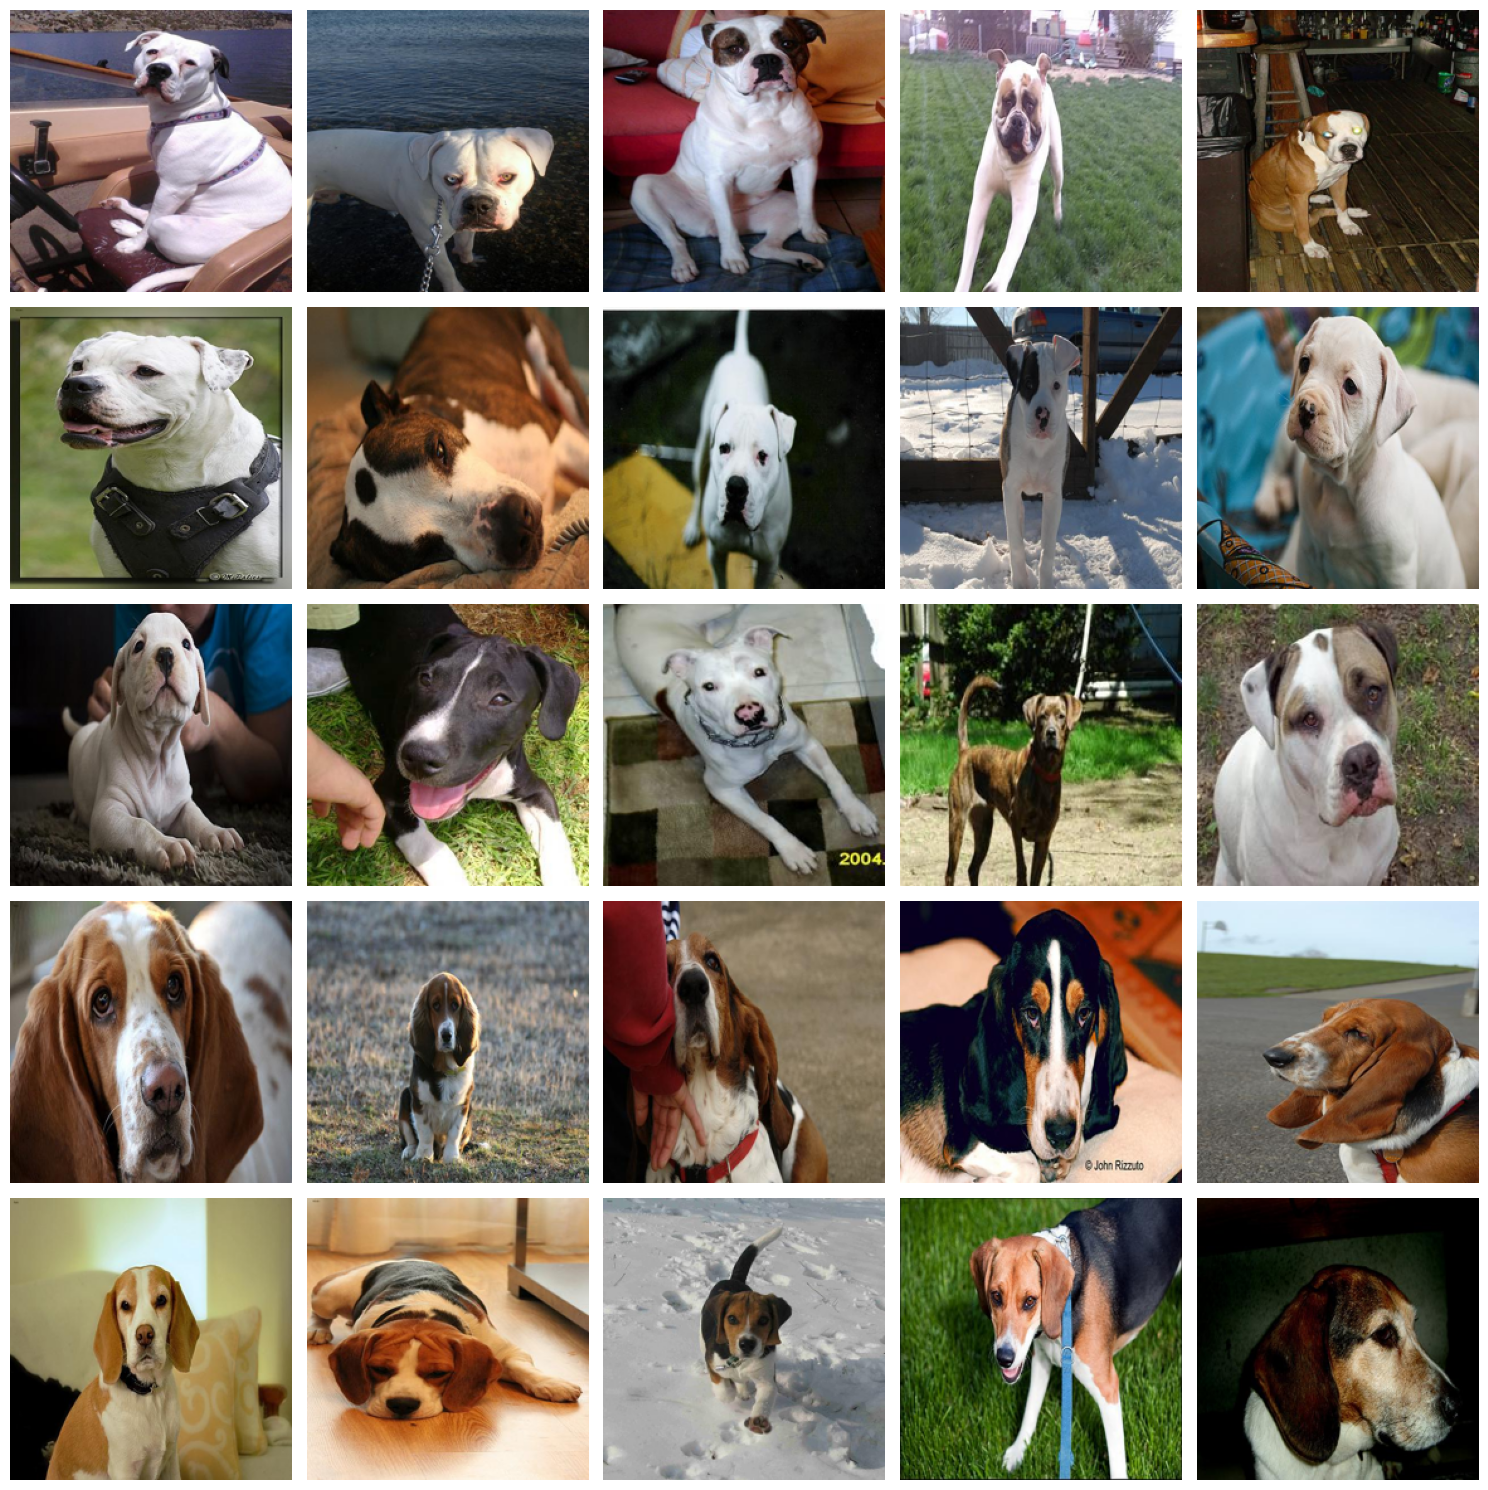

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

# Directorio con las imágenes
folder = dest_train_dog
images = os.listdir(folder)

# Mostrar algunas imágenes con pyplot
plt.figure(figsize=(15, 15))

# Mostrar las primeras 25 imágenes
for i, img_name in enumerate(images[:25]):
    try:
        # Ruta completa de la imagen
        img_path = os.path.join(folder, img_name)
        
        # Abrir y redimensionar la imagen a un tamaño 224x224
        img = Image.open(img_path)
        img = img.resize((224, 224))  # Redimensionar para que todas las imágenes tengan el mismo tamaño
        
        # Convertir la imagen a un array y mostrarla
        plt.subplot(5, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')  # No mostrar los ejes para una mejor visualización
    except Exception as e:
        print(f"Error al cargar la imagen {img_name}: {e}")

# Mostrar las imágenes
plt.tight_layout()
plt.show()


Aplicamos aumento de datos con ImageDataGenerator

In [8]:
#  Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuración de aumento de datos
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=30,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=15,
    zoom_range=[0.5, 1.5],
)

# Rutas del dataset
train_dir = r'C:\Documentos\CURSOS\Diplomatura en Data Science Aplicada\TPS entregados\TP5\imagenes\dataset\train'
val_dir = r'C:\Documentos\CURSOS\Diplomatura en Data Science Aplicada\TPS entregados\TP5\imagenes\dataset\val'

# Generadores para train y val
data_gen_train = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Tamaño al que se redimensionan las imágenes
    batch_size=32,
    shuffle=True,  # Mezcla aleatoria para entrenamiento
    class_mode='categorical'  
)

data_gen_val = datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),  # Tamaño al que se redimensionan las imágenes
    batch_size=32,
    shuffle=False,  # No se mezclan los datos de validación
    class_mode='categorical'  
)


Found 360 images belonging to 2 classes.
Found 92 images belonging to 2 classes.


Se imprimirán algunas imagenes luego de aplicar la técnica de aumento de imagenes

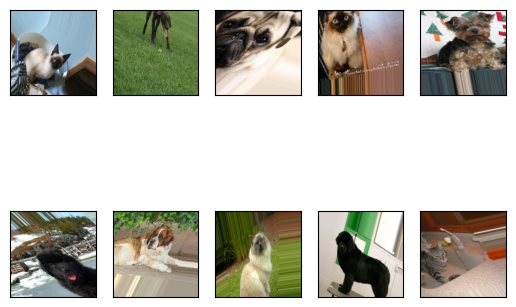

In [9]:
# Imprimamos algunas de las imágenes del set
import matplotlib.pyplot as plt
for image, label in data_gen_train:
  for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image[i])
  break
plt.show()

Probamos aplicar el modelo de CNN de Transfer Learning MobileNetV2 de ImageNet

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models  # Importa 'models' y 'layers' correctamente

# Construcción del modelo con MobileNetV2

# Cargar MobileNetV2 preentrenado (sin la capa superior) con pesos de imagenet
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelar las capas del modelo base
base_model.trainable = False

# Crear el modelo
model = models.Sequential([
    base_model,  
    layers.GlobalAveragePooling2D(),  
    layers.Dense(1024, activation='relu'),  
    layers.Dropout(0.5),  
    layers.Dense(data_gen_train.num_classes, activation='softmax') 
])

# Compilar el modelo
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenar el modelo
history = model.fit(
    data_gen_train,
    steps_per_epoch=data_gen_train.samples // data_gen_train.batch_size,  # Calcula los pasos por época
    epochs=10,
    validation_data=data_gen_val,
    validation_steps=data_gen_val.samples // data_gen_val.batch_size  # Calcula los pasos por validación
)


C:\Users\Fer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.6478 - loss: 0.8424 - val_accuracy: 0.9688 - val_loss: 0.0890
Epoch 2/10
 1/11 ━━━━━━━━━━━━━━━━━━━━ 9s 916ms/step - accuracy: 0.9062 - loss: 0.4480

C:\Users\Fer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 328ms/step - accuracy: 0.9062 - loss: 0.4480 - val_accuracy: 0.9688 - val_loss: 0.0837
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.9097 - loss: 0.2455 - val_accuracy: 0.9844 - val_loss: 0.0348
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 299ms/step - accuracy: 0.8750 - loss: 0.2506 - val_accuracy: 0.9375 - val_loss: 0.2015
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.9150 - loss: 0.1980 - val_accuracy: 0.9531 - val_loss: 0.1690
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 310ms/step - accuracy: 1.0000 - loss: 0.0193 - val_accuracy: 0.9531 - val_loss: 0.1545
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9245 - loss: 0.2058 - val_accuracy: 0.9375 - val_loss: 0.0934
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 326ms/step - accuracy: 1.0000 - loss: 0.0187 - val_accuracy: 0.9375 - val_loss: 0.0971
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9252 - loss: 0.1884 - val_accuracy: 0.9531 - val_loss: 0.

Obtenemos un accuracy superior al 90%, por lo que el modelo es muy preciso

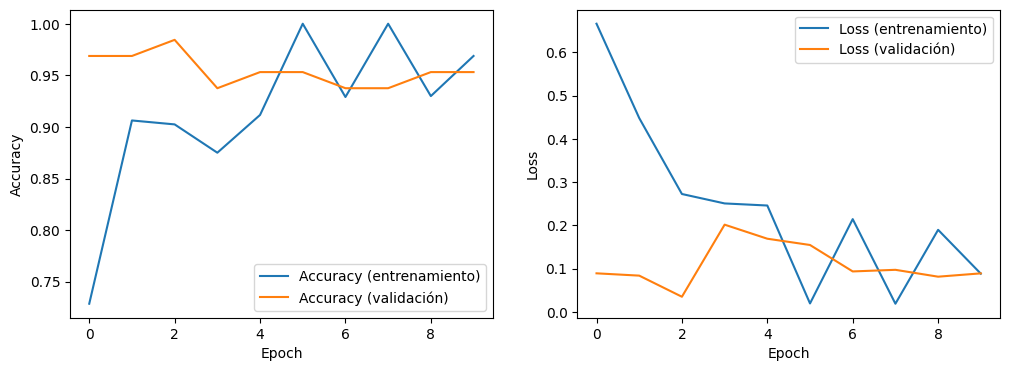

In [11]:
# Gráficas
# Gráficar el accuracy y el loss durante el entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy (entrenamiento)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validación)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss (entrenamiento)')
plt.plot(history.history['val_loss'], label='Loss (validación)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Al realizar la predicción con la imagen de test, observamos que la misma es correcta. 

In [18]:
import requests
from PIL import Image
from io import BytesIO

def categorize(image_path):
    # Cargar la imagen desde el directorio local
    img = Image.open(image_path)
    
    # Convertir la imagen a RGB (en caso de que esté en otro formato)
    img = img.convert('RGB')
    
    # Redimensionar la imagen a 224x224 usando PIL
    img = img.resize((224, 224))  # Redimensionar la imagen
    
    # Convertir la imagen a un array de numpy y normalizar
    img = np.array(img).astype(float) / 255.0
    
    # Asegurarse de que la imagen tiene la forma correcta para hacer la predicción
    img = img.reshape(1, 224, 224, 3)  # Agregar la dimensión del batch
    
    # Realizar la predicción
    prediction = model.predict(img)
    
    # Obtener la clase predicha (0 para 'cat', 1 para 'dog' si es binaria)
    return np.argmax(prediction[0], axis=-1)

In [19]:
# 0: cat
# 1: dog

# Tiene que ver con el orden en el que se cargaron las carpetas en la carpeta dataset

image_path = 'C:/Documentos/CURSOS/Diplomatura en Data Science Aplicada/TPS entregados/TP5/imagenes/image.jpg'
predicted_class = categorize(image_path)
print(f'Predicción: {"Cat" if predicted_class == 0 else "Dog"}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Predicción: Dog


Además, predeciremos algunas imagenes de internet, y también observamos que la predicción es correcta

In [20]:
def categorize(url):
    # Obtener la imagen desde la URL
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    
    # Convertir la imagen a RGB (en caso de que esté en otro formato)
    img = img.convert('RGB')
    
    # Redimensionar la imagen a 224x224 usando PIL
    img = img.resize((224, 224))  # Cambié cv2.resize por img.resize
    
    # Convertir la imagen a un array de numpy
    img = np.array(img).astype(float) / 255.0
    
    # Asegurarse de que la imagen tiene la forma correcta para hacer la predicción
    img = img.reshape(1, 224, 224, 3)  # Agregar la dimensión del batch
    
    # Realizar la predicción
    prediction = model.predict(img)
    
    # Obtener la clase predicha
    return np.argmax(prediction[0], axis=-1)

In [21]:
# 0: cat
# 1: dog

# Tiene que ver con el orden en el que se cargaron las carpetas en la carpeta dataset

url = 'https://nupec.com/wp-content/uploads/2021/02/Captura-de-pantalla-2021-02-08-a-las-13.59.48.png'
prediction = categorize(url)
print(f'Predicción: {"Cat" if prediction == 0 else "Dog"}')

url = 'https://humanidades.com/wp-content/uploads/2017/02/perro-1-e1561678907722.jpg'
prediction = categorize(url)
print(f'Predicción: {"Cat" if prediction == 0 else "Dog"}')

url = 'https://hospitalveterinariodonostia.com/wp-content/uploads/2022/02/Personalidad-gatos-674x337.png'
prediction = categorize(url)
print(f'Predicción: {"Cat" if prediction == 0 else "Dog"}')

url = 'https://doggiesintown.com/wp-content/uploads/2023/08/El-Fascinante-Mundo-del-Perro-Salchicha-Explorando-su-Historia-Crianza-y-Personalidad-Unica-Doggies-in-Town-1200x676-5.jpg'
prediction = categorize(url)
print(f'Predicción: {"Cat" if prediction == 0 else "Dog"}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Predicción: Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Predicción: Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Predicción: Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Predicción: Dog
